# Logistic regression with pystan

## 0. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import stan
import arviz as az

In [2]:
import nest_asyncio
nest_asyncio.apply()
del nest_asyncio

## 1. Binary univariate classification

In [3]:
N = 50

In [4]:
x1 = np.random.normal(2.5, 1, N)
x2 = np.random.normal(4, 1, N)
data = pd.DataFrame([x1, x2]).T
data.head()

,0,1
0,3.750242,5.114645
1,2.596737,3.134666
2,1.164012,3.249998
3,3.138218,6.573534
4,1.980861,2.956283


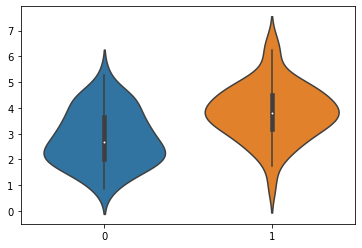

In [5]:
sns.violinplot(data=data)
plt.show()

In [6]:
x_0 = np.concatenate([x1, x2]).reshape((2*N, 1))
y_0 = np.concatenate([np.zeros(N), np.ones(N)]).astype(int)

In [7]:
code = """                                                                                         
data {                                                                                               
  int N; //the number observations                                                                                                                 
  int K; //the number of features                                                                    
  int y[N]; //the response                                                                           
  matrix[N,K] X; //the model matrix                                                                  
}                                                                                                    
parameters {                                                                                         
  real alpha;                                                                                        
  vector[K] beta; //the regression parameters                                                        
}                                                                                                    
transformed parameters {                                                                             
  vector[N] linpred;                                                                                 
  linpred = alpha+X*beta;                                                                            
}                                                                                                    
model {                                                                                              
  alpha ~ normal(0,10); //prior for the intercept following Gelman 2008                              
                                                                                                   
  for(i in 1:K)                                                                                      
    beta[i] ~ normal(0,10);                                                                 
                                                                                                   
  y ~ bernoulli_logit(linpred);                                                                      
}                                                                                                                                                                                                       
"""  

In [8]:
y_0.shape

(100,)

In [9]:
data = {                                                                                             
    'N': 2*N,                                                                                        
    'K': 1,                                                                                        
    'y': y_0,                                                                                     
    'X': x_0                                                                                             
}  

In [10]:
posterior = stan.build(code, data=data, random_seed=1)


Building: found in cache, done.
Messages from stanc:
Warning in '/var/folders/79/lndg0b5n2q3b40m_ty2kxlm40000gn/T/httpstan_ryt1tp_e/model_aezd2xva.stan', line 5, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc


In [11]:
fit = posterior.sample(num_chains=2, num_samples=1000)


Sampling:   0%
Sampling:  50% (2000/4000)
Sampling: 100% (4000/4000)
Sampling: 100% (4000/4000), done.
Messages received during sampling:
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!


In [12]:
df = fit.to_frame()  # pandas `DataFrame, requires pandas
print(df.describe().T)

                count       mean       std        min        25%        50%  \
parameters                                                                    
lp__           2000.0 -60.151606  1.067608 -69.597346 -60.518969 -59.791637   
accept_stat__  2000.0   0.934934  0.099070   0.338735   0.913018   0.976895   
stepsize__     2000.0   0.203472  0.006808   0.196666   0.196666   0.203472   
treedepth__    2000.0   2.603500  0.944846   1.000000   2.000000   3.000000   
n_leapfrog__   2000.0   9.876000  7.070051   1.000000   3.000000   7.000000   
...               ...        ...       ...        ...        ...        ...   
linpred.96     2000.0   0.376229  0.252069  -0.666699   0.205635   0.375691   
linpred.97     2000.0   1.407717  0.420284  -0.151172   1.130574   1.391730   
linpred.98     2000.0   1.100313  0.360053  -0.304809   0.860532   1.093686   
linpred.99     2000.0  -0.056393  0.232239  -0.882918  -0.215951  -0.055077   
linpred.100    2000.0   0.136175  0.235476  -0.78667

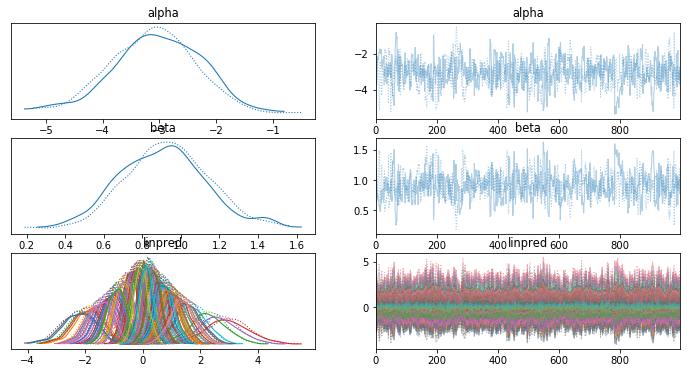

In [13]:
az.plot_trace(fit)
plt.show()

## 2. Binary bivariate classification

In [14]:
data_1 = np.random.normal([2.5,2.5],[1,1], [50,2])
data1_x = data_1[:,0]
data1_y = data_1[:,1]

data_2 = np.random.normal([4,4],[1,1], [50,2])
data2_x = data_2[:,0]
data2_y = data_2[:,1]

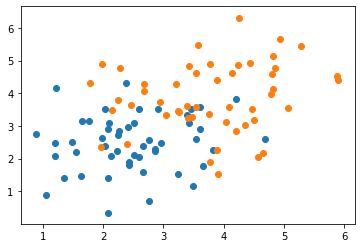

In [15]:
plt.scatter(data1_x, data1_y)
plt.scatter(data2_x, data2_y)
plt.show()